## Лабораторная работа. Знакомство с библиотеками для анализа данных

### О задании

Лабораторная работа направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Для каждой задачи приведите примеры использования реализованных функций.

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [1]:
import numpy as np

**(0.25 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [5]:
def construct_array(X, indices1, indices2):    
    return X[indices1, indices2]

In [6]:
# Example
X = np.arange(16).reshape(4, -1)
ind1 = np.random.randint(X.shape[0], size=4)
ind2 = np.random.randint(X.shape[0], size=4)
print("ind1: {},\nind2: {},\nX:\n{},".format(ind1, ind2, X))

construct_array(X, ind1, ind2)

ind1: [0 1 0 2],
ind2: [0 0 1 3],
X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]],


array([ 0,  4,  1, 11])

**(0.25 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [7]:
def detect_identic(X, Y):
    return np.array_equal(X, Y)

In [8]:
# Example
X = np.hstack((np.random.randint(2), np.ones(15))).reshape(4, 2, 2)
Y = np.hstack((np.random.randint(2), np.ones(15))).reshape(4, 2, 2)
print("X:\n{},\nY:\n{}".format(X, Y))

detect_identic(X, Y)

X:
[[[0. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]],
Y:
[[[0. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


True

**(0.25 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [5]:
def mean_channel(X):
    return X.mean(axis=(0, 1))

In [10]:
# Example
X = np.random.randint(256, size=18).reshape(3, 2, 3)
print("X:\n{}".format(X))

mean_channel(X)

X:
[[[124  33 217]
  [237  74  96]]

 [[102 135 124]
  [159  84 111]]

 [[170 125 164]
  [ 38 245  17]]]


array([138.33333333, 116.        , 121.5       ])

In [20]:
X_3d = np.reshape(np.arange(0, 60), (3, 5, 4))
X_3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]],

       [[40, 41, 42, 43],
        [44, 45, 46, 47],
        [48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59]]])

In [18]:
mean_channel(X_3d)

array([28., 29., 30., 31.])

In [17]:
np.mean([np.arange(0 + 20*i, 20 + 20*i) for i in range(3)], axis=1)

array([ 9.5, 29.5, 49.5])

In [19]:
assert mean_channel(X_3d) == np.mean([np.arange(0 + 20*i, 20 + 20*i) for i in range(3)], axis=1)

<ipython-input-19-105fcaa7f796>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  assert mean_channel(X_3d) == np.mean([np.arange(0 + 20*i, 20 + 20*i) for i in range(3)], axis=1)


AssertionError: 

In [22]:
def correct_mean_channel(X):
    return np.mean(X, axis=(1, 2))

In [23]:
correct_mean_channel(X_3d)

array([ 9.5, 29.5, 49.5])

### Не правильно указали axis. Лучше дебажить на тензорах где только она размерность = 3.

**(0.25 балла) Задание 4.** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [11]:
def nearest_value(X, a):
    ind = np.unravel_index(np.absolute(X - a).argmin(), X.shape)
    return X[ind]

In [12]:
# Example
X = np.random.randint(-4, 5, size=9).reshape(3, 3)
a = np.round(np.random.normal(0, 5), 2)
print("a = {},\nX:\n{}".format(a, X))

nearest_value(X, a)

a = 2.92,
X:
[[ 1  3 -3]
 [ 1 -3  3]
 [ 0 -4  1]]


3

**(0.5 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [13]:
def construct_matrix(x, y):
    if x.shape[0] > y.shape[0]:
        y = np.append(y, np.zeros(x.shape[0]-y.shape[0]))
    else:
        x = np.append(x, np.zeros(y.shape[0]-x.shape[0]))
    
    return np.hstack((x.reshape(-1, 1), 
                      y.reshape(-1, 1)))

In [14]:
# Example
x = np.random.normal(size=4).round(2)
y = np.random.normal(size=6).round(2)
print("x: {},\ny: {}".format(x, y))

construct_matrix(x, y)

x: [ 0.23  0.94 -2.27 -0.25],
y: [-0.65  2.36 -0.14 -1.04 -0.53 -1.89]


array([[ 0.23, -0.65],
       [ 0.94,  2.36],
       [-2.27, -0.14],
       [-0.25, -1.04],
       [ 0.  , -0.53],
       [ 0.  , -1.89]])

**(0.5 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [15]:
def add_zeros(x):
    y = np.empty(2*x.shape[0]-1, dtype=int)
    y[::2] = x
    y[1::2] = 0
    
    return y

In [16]:
# Example
x = np.random.randint(-9, 10, size=np.random.randint(5, 7))
print("x: {}".format(x))

add_zeros(x)

x: [ 0  5  4  7 -7]


array([ 0,  0,  5,  0,  4,  0,  7,  0, -7])

**(0.75 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [28]:
def nonzero_product(X):
    diag = np.diag(X)
    diag = diag[diag != 0]
    
    return diag.prod() if diag.shape[0] else None

In [18]:
# Example
X = np.diag(np.random.randint(2, size=4))
print("X:\n{}".format(X))

nonzero_product(X)

X:
[[0 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


1

**(0.75 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [19]:
def max_element(X):
    ind = np.where(X == 0)[0][:-1 if X[-1] == 0 else None]
    return X[ind+1].max() if ind.size else None

In [20]:
# Example
X = np.random.randint(4, size=9)
print("X: {}".format(X))

max_element(X)

X: [1 0 2 0 0 2 0 3 3]


3

**(0.75 балла) Задание 9.** Реализуйте функцию, принимающую на вход матрицу ```X``` и возвращающую все её уникальные строки в виде матрицы.

In [21]:
def get_unique_rows(X):
    return np.unique(X, axis=0)

In [22]:
# Example
X = np.random.randint(2, size=18).reshape(-1, 3)
print("X:\n{}".format(X))

get_unique_rows(X)

X:
[[1 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


array([[0, 1, 0],
       [0, 1, 1],
       [1, 0, 1]])

**(0.75 балла) Задача 10.** Реализуйте функцию, каторая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [118]:
def replace_nans(X):
    nonnans = X[~np.isnan(X)]
    X[np.isnan(X)] = nonnans.sum()/nonnans.size
    
    return X

In [24]:
# Example
X = np.random.choice([np.nan, 2, 3], size=(2, 2))
print("X:\n{}:".format(X))

replace_nans(X)

X:
[[nan  3.]
 [ 2. nan]]:


array([[2.5, 3. ],
       [2. , 2.5]])

### Довольно сложный способ, не проще ли через mean

**(1 балл) Задача 11.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [38]:
def vander(x):
    if x.ndim == 1:
        if x.shape[0] == 1: return np.ones((1, 1))
        else:
            x = np.hstack((np.ones((x.shape[0], 1)),
                           x.reshape(-1, 1)))
    
    if x.shape[0] == x.shape[1]: return x
    
    x = np.hstack((x, (x[:, -1]*x[:, 1]).reshape(-1, 1)))
    
    return vander(x)

In [39]:
# Example
x = np.random.randint(5, size=4)
print("x: {}".format(x))

vander(x)

x: [4 1 3 3]


array([[ 1.,  4., 16., 64.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  3.,  9., 27.]])

### Сложный способ, проще использовать broadcasting

In [40]:
def vander(x):
    x = x[:, np.newaxis]
    power = np.arange(len(x))
    return np.power(x, power)

In [41]:
vander(x)

array([[ 1,  4, 16, 64],
       [ 1,  1,  1,  1],
       [ 1,  3,  9, 27],
       [ 1,  3,  9, 27]], dtype=int32)

**(1 балл) Задача 12.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i и Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

**Искомая матрица** имеет вид(если я правильно понял):$$ Z_{ij} = \frac{X_i \cdot Y_j}{\|X_i\|_2 \|Y_j\|_2} $$

In [43]:
def cos_matrix(X, Y, Z=None, inv_Y_norms=None):
    if Z is None: Z = np.array([]).reshape(0, Y.shape[0])
    if inv_Y_norms is None:
        inv_Y_norms = np.power(np.sum(np.power(Y, 2), axis=1), -0.5)
    
    if X.shape[0] == 0: return Z
    else:
        z = np.dot(Y, X[0])*inv_Y_norms*\
        np.power(np.power(X[0], 2).sum(), -0.5)
        Z = np.vstack((Z, z))
        X = X[1:]
    
    return cos_matrix(X, Y, Z, inv_Y_norms)

In [44]:
# Example
X = np.random.randint(1, 5, size=(2, 3))
Y = np.random.randint(1, 5, size=(4, 3))
print("X:\n{},\nY:\n{}".format(X, Y))

cos_matrix(X, Y)

X:
[[3 2 4]
 [4 3 1]],
Y:
[[3 2 4]
 [3 2 3]
 [4 1 2]
 [3 4 2]]


array([[1.        , 0.98975948, 0.89148499, 0.86206897],
       [0.80119274, 0.87805411, 0.89871703, 0.94686415]])

In [47]:
X

array([[3, 2, 4],
       [4, 3, 1]])

In [48]:
Y

array([[3, 2, 4],
       [3, 2, 3],
       [4, 1, 2],
       [3, 4, 2]])

### Решение будет проще, если использовать broadcasting

In [45]:
def dist_no_loops(X, Y):
    # тут что-то сломалось, но в качества примера оставлю 
    dist = np.sum(X[:, np.newaxis, :] * Y, axis=2)
    dist /= np.power(np.sum(np.power(X, 2), axis=1), 0.5)[:, np.newaxis]
    dist /= np.power(np.sum(np.power(Y, 2), axis=1), 0.5)
    return dist

In [50]:
def dist_loop(X: np.ndarray, Y: np.ndarray):
    rows, columns = X.shape[0], Y.shape[0]
    dists = np.zeros((rows, columns))
    del_Y = np.power(np.sum(np.power(Y, 2), axis=1), 0.5)
    for i in range(rows):
        line = np.sum(X[i, :] * Y, axis=1)
        del_X = np.power(np.sum(np.power(X[i, :], 2)), 0.5)
        dists[i, :] = line / (del_X * del_Y)
    return dists

In [69]:
X = np.arange(0, 20).reshape(5, 4)
Y = np.ones((10, 4))

In [70]:
dist_loop(X, Y)

array([[0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373,
        0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373],
       [0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789,
        0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789],
       [0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591,
        0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591],
       [0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819,
        0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819],
       [0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541,
        0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541]])

In [71]:
dist_no_loops(X, Y)

array([[0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373,
        0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373],
       [0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789,
        0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789],
       [0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591,
        0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591],
       [0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819,
        0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819],
       [0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541,
        0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541]])

**(1 балл) Задача 13.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Для тестирования можно сгенерировать с помощью метода [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) случайную матрицу и проверить на ней работу метода.

Убедитесь, что в функции не будет происходить деления на ноль, если происходит деление на ноль, то верните **None**.

In [29]:
def scale(X):
    std = X.std(axis=0)
    return (X-X.mean(axis=0))/std if not std[std == 0].size else None

In [30]:
# Example
X = np.random.randint(6, size=(3, 4))
print("X:\n{}".format(X))

scale(X)

X:
[[5 5 0 5]
 [1 3 3 5]
 [1 5 3 5]]


**(1 балл) Задача 14.** Пусть $N=1000$. Повторите $N$ раз следующий эксперимент: сгенерируйте две матрицы размера $N×N$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? 

При решение задачи для повторения экспериментов воспользуйтесь [list comprehension](https://habrahabr.ru/post/30232/), а также [tqdm_notebook](https://habrahabr.ru/post/276725/) - для отслеживания прогресса.

In [31]:
from tqdm import tqdm

def create_matrix(N):
    exp = [np.dot(np.random.normal(size=(N, N)),
                  np.random.normal(size=(N, N))).max() for i in tqdm(range(N))]
    return np.mean(exp), np.quantile(exp, 0.95)

In [32]:
# Example
create_matrix(1000)

100%|██████████| 1000/1000 [01:37<00:00, 10.22it/s]


(154.3842103609061, 168.60389675965018)

### как я понял lisct compr предложили использовать для тестов, первая функция должна быть без них. 

### Аналитика данных с Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите таблицу с данными из ```articles.csv```. Удалите записи, в которых присутствуют пропуски.


**(0.5 балла) Задача 15.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [33]:
import pandas as pd

In [44]:
df = pd.read_csv('articles.csv')
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50000 non-null  int64 
 1   title        50000 non-null  object
 2   publication  50000 non-null  object
 3   author       43694 non-null  object
 4   date         50000 non-null  object
 5   year         50000 non-null  int64 
 6   month        50000 non-null  int64 
 7   content      50000 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.1+ MB
None


id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date  year  month  \
0                     Carl Hulse  2016-12-31  2016     12   
1  Benjamin Mueller and Al Baker  2017-06-19  2017      6   
2                   Margalit Fox  2017-01-06  2017      1   
3               William McDonald  2017-04-10  2017      4   
4                  Choe Sang-Hun  2017-01-02  2017      1   

                                             content  
0  WASHINGTON  —   Congressional Republicans have...  
1  After the bullet shells get counted, the blood...  
2  When Walt Disney’s “Bambi” opened in 1942, cri...  
3  Death may be the great equalizer, but it isn’t...  
4  SEOUL, South Korea  —   North Korea’s leader, ...

In [45]:
# определите количество различных издательств в таблице;
df["publication"].unique().size

5

In [54]:
# найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
df["date"] = pd.to_datetime(df["date"])
mask = (df["date"] >= pd.to_datetime("2016-06-01")) & (df["date"] <= pd.to_datetime("2016-12-31"))

df[mask].shape[0]

19408

2017    132
2016    124
Name: year, dtype: int64

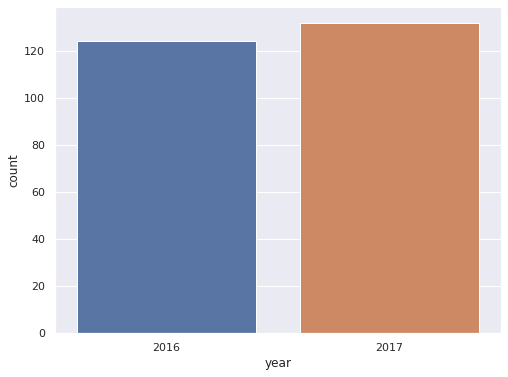

In [55]:
# посчитайте распределение статей автора Tom Ciccotta по годам;
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 6)})

df["author"] = df["author"].astype(str)
df1 = df[df["author"] == "Tom Ciccotta"]["year"]

sns.countplot(df1)

df1.value_counts()

In [58]:
# найдите месяц, в котором было наибольшее число статей;
sr = df["month"].value_counts()
sr.index[sr.argmax()]

1

In [59]:
# выпишите 3 первые статьи автора John Hayward в 2016 году.
df[(df["author"] == "John Hayward") & (df["year"] == 2016)].sort_values("date").head(3)

id                                              title publication  \
16861  35600  Indonesian Couple Beaten with Canes for Violat...   Breitbart   
22041  40791  Islamic State Claims Credit For Gun Attack On ...   Breitbart   
27561  46325  Protests Across India Against Saudi Execution ...   Breitbart   

             author       date  year  month  \
16861  John Hayward 2016-01-01  2016      1   
22041  John Hayward 2016-01-01  2016      1   
27561  John Hayward 2016-01-04  2016      1   

                                                 content  
16861  Islamic sharia law was enforced with canes onc...  
22041  The Islamic State has claimed responsibility f...  
27561  Protests over Saudi Arabia’s execution of Shii...

**Работа со строками в датафрейме.**

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 16.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [449]:
df[(df["author"].str.find("Faith")+1).astype(bool)]["author"].unique()

array([' Faith Haleh Robinson', 'Faith Karimi', 'Faith Haleh Robinson',
       'Faith Karimi,', 'Faith Karimi ', 'Faith Karimi, ',
       ' Faith Karimi', ' Faith Karimi '], dtype=object)

**(1 балл) Задача 17.**

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [60]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
conv = lambda s: " ".join(s.translate(str.maketrans("", "", punctuation)).casefold().split())

df["author"] = df["author"].apply(conv)
df["content"] = df["content"].apply(conv)

df[["author", "content"]]

author  \
0                         carl hulse   
1      benjamin mueller and al baker   
2                       margalit fox   
3                   william mcdonald   
4                       choe sanghun   
...                              ...   
49995                 robinson meyer   
49996                     amy zegart   
49997                  jeremy venook   
49998                    emily deruy   
49999                   marina koren   

                                                 content  
0      washington — congressional republicans have a ...  
1      after the bullet shells get counted the blood ...  
2      when walt disney’s “bambi” opened in 1942 crit...  
3      death may be the great equalizer but it isn’t ...  
4      seoul south korea — north korea’s leader kim s...  
...                                                  ...  
49995  as chairman and ceo of exxonmobil rex tillerso...  
49996  i’ve spent nearly 20 years looking at intellig...  
49997  donald trump will not be taking necessary step...  
49998  dozens of colleges could be forced to close in...  
49999  the force of gravity can be described using a ...  

[50000 rows x 2 columns]

In [61]:
# Подсчитайте статистику для имени Faith из прошлого задания. 
# Проверьте, что теперь различные способы написания «схлопываются» в один.
df[(df["author"].str.find("faith")+1).astype(bool)]["author"].value_counts()

faith karimi            88
faith haleh robinson     2
Name: author, dtype: int64

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 18.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [107]:
df.groupby(["author", "year"])["id"].count().reset_index()\
.sort_values(by="id", ascending=False).drop_duplicates(subset="author", keep="first")\
.rename(columns={"id": "num_pub"}).head(20)

author  year  num_pub
3426                  nan  2016     2862
649        breitbart news  2016     1317
3634              pam key  2016      820
832      charlie spiering  2016      660
144           alex swoyer  2016      584
1048      daniel nussbaum  2016      532
483           awr hawkins  2016      525
2195         john hayward  2016      521
2072        jerome hudson  2016      482
1771         ian hanchett  2016      429
2162        joel b pollak  2016      417
1987            jeff poor  2016      323
4708   warner todd huston  2016      316
4641          trent baker  2016      280
3676       patrick howley  2016      259
646      breitbart london  2016      258
1546       frances martel  2016      257
820          charlie nash  2016      254
2493  katherine rodriguez  2017      231
533               ben kew  2016      221

In [ ]:
gb = df[["author", "year", "id"]].groupby(
    ["author", "year"]
).count().reset_index().sort_values(
    "id",
    ascending=False
).drop_duplicates(
    subset="author"
)
gb.head(20)

**(1 балл) Задача 19.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

**Hint**. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [ ]:
gb = df[["publication", "date", "id"]].groupby(["publication", "date"]).count()
gb["cumsum"] = gb.groupby(level=0).cumsum()
gb.drop(columns="id", inplace=True)
gb.reset_index(inplace=True)
gb.head(14)

### Визуализация

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 балла) Задача 20.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

In [111]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8, 6)})

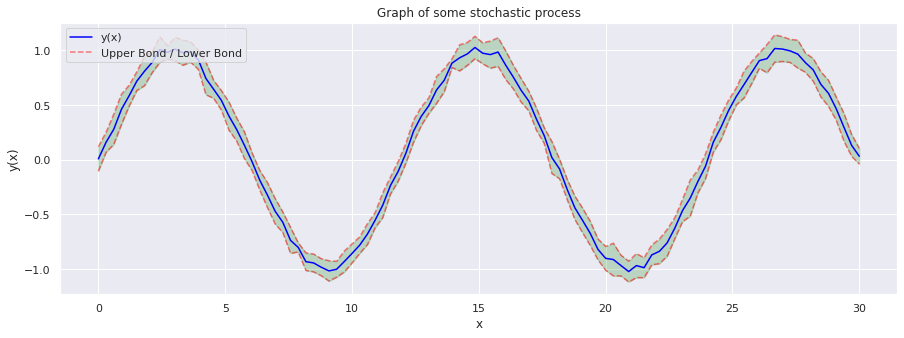

In [112]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

x, y, err = gen_uncertain_data()
lower_bond = y-err
upper_bond = y+err

plt.figure(figsize=(15, 5))
plt.title("Graph of some stochastic process")
plt.plot(x, y, color="blue", label="y(x)")
plt.plot(x, upper_bond, "r--", alpha=0.5, color="red", 
         label="Upper Bond / Lower Bond")
plt.plot(x, lower_bond, "r--", alpha=0.5, color="red")
plt.fill_between(x, y1=upper_bond, y2=lower_bond, alpha=0.2, 
                 color = "green")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

**(0.5 балла) Задача 21.** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).


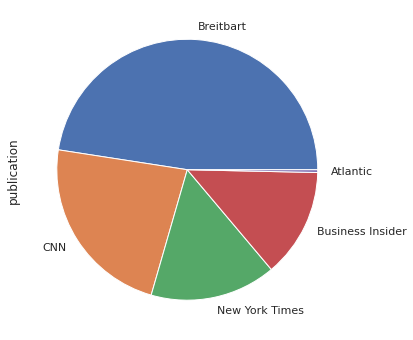

In [113]:
df["publication"].value_counts().plot.pie(figsize=(6, 6))
None

**(0.5 балла) Задача 22.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

2016

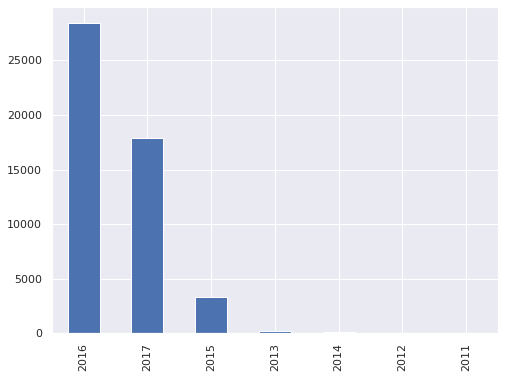

In [116]:
sr1 = df["year"].value_counts()

sr1.plot.bar(figsize=(8, 6))
sr1.index[sr1.argmax()]

**(0.5 балла) Задача 23.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

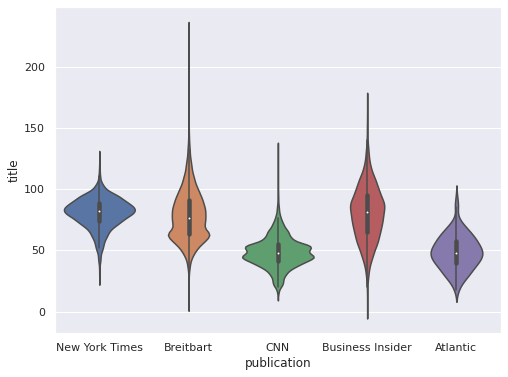

In [117]:
df["title"] = df["title"].astype(str)
sns.violinplot(x=df["publication"], y=df["title"].str.len(), figure=(10, 8))
None